<a href="https://colab.research.google.com/github/HagaiEshel/Python/blob/master/Landclub_HE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data from google drive
loans = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATA/lending_club_loan_two.csv')


In [ ]:
# print the info
loans.info

<bound method DataFrame.info of         loan_amnt  ...                                            address
0         10000.0  ...     0174 Michelle Gateway\r\nMendozaberg, OK 22690
1          8000.0  ...  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         15600.0  ...  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3          7200.0  ...            823 Reid Ford\r\nDelacruzside, MA 00813
4         24375.0  ...             679 Luna Roads\r\nGreggshire, VA 11650
...           ...  ...                                                ...
396025    10000.0  ...   12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    21000.0  ...  0114 Fowler Field Suite 028\r\nRachelborough, ...
396027     5000.0  ...  953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    21000.0  ...  7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029     2000.0  ...      787 Michelle Causeway\r\nBriannaton, AR 48052

[396030 rows x 27 columns]>

In [ ]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
#check for missing values
loans.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
loans['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [ ]:
# drop the lines missing 'pub_rec_bankruptcies'
loans['pub_rec_bankruptcies'].dropna(inplace=True)

In [ ]:
loans['pub_rec_bankruptcies'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
loans['revol_util'].unique()
#if missing use the mean
loans['revol_util'].fillna(loans['revol_util'].mean(),inplace=True)

In [ ]:
loans['mort_acc'].describe()


count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [ ]:
# fill the NAN in Mort Acc with the number 2 (close to the mean)
loans['mort_acc'].fillna(value=2,inplace=True)

In [ ]:
loans['pub_rec_bankruptcies'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
# Duumy variable for the status (i.e target) 
loans=pd.get_dummies(data=loans,columns=['loan_status'],drop_first=True)

In [ ]:

years={'10+ years':10, '4 years':4, '< 1 year':0, '6 years':6, '9 years':9,
       '2 years':2, '3 years':3, '8 years':8, '7 years':7, '5 years':5, '1 year':1, '0':0}
loans['emp_y']=loans['emp_length'].map(years)

In [ ]:
loans['emp_y'].describe()

count    377729.000000
mean          5.938578
std           3.645623
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_y, dtype: float64

In [ ]:
# fill the missing data with the mean (6)  
loans['emp_y'].fillna(value=6,inplace=True)

In [ ]:
#check for missing values in loans_adj
loans.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                 22927
emp_length                18301
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
title                      1755
dti                           0
earliest_cr_line              0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                      0
pub_rec_bankruptcies        535
address                       0
loan_status_Fully Paid        0
emp_y                         0
dtype: int64

In [ ]:
loans.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_Fully Paid,emp_y
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,10.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,4.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,6.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,9.0
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Sep-2015,debt_consolidation,Debt consolidation,16.31,Jan-2005,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...,1,10.0
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Sep-2015,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",1,2.0
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Sep-2012,credit_card,No More Credit Cards,26.87,Sep-1994,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723,1,10.0
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Oct-2014,debt_consolidation,Debt consolidation,12.52,Jun-1994,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690,1,10.0
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Apr-2012,debt_consolidation,Debt Consolidation,23.69,Dec-1997,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813",1,3.0


In [ ]:
#loans_adj.corr()['loan_status_Fully Paid'].sort_values()

int_rate                 -0.247758
revol_util               -0.082373
dti                      -0.062413
loan_amnt                -0.059836
installment              -0.041082
open_acc                 -0.028012
pub_rec                  -0.019933
pub_rec_bankruptcies     -0.009383
revol_bal                 0.010892
total_acc                 0.017893
annual_inc                0.053432
mort_acc                  0.073111
loan_status_Fully Paid    1.000000
Name: loan_status_Fully Paid, dtype: float64

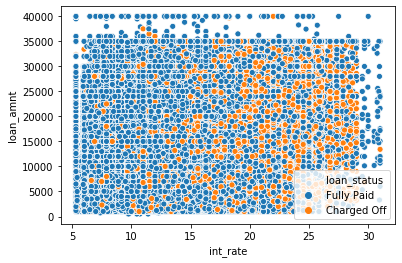

In [ ]:
sns.scatterplot(x='int_rate',y='loan_amnt',data=loans,hue='loan_status')

In [ ]:
loans_adj['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
loans=pd.get_dummies(data=loans,columns=['term'],drop_first=True)

In [ ]:
loans_adj['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
grade={'B':2, 'A':1, 'C':3, 'E':5, 'D':4, 'F':6, 'G':7}
loans['grade_n']=loans['grade'].map(grade)

In [ ]:
loans_adj['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
loans['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
# check the CORR of Loan Status to other parameters in order to optimize home_ownership
loans.corr()['loan_status_Fully Paid'].sort_values()

grade_n                  -0.257286
int_rate                 -0.247758
term_ 60 months          -0.173246
revol_util               -0.082341
dti                      -0.062413
loan_amnt                -0.059836
installment              -0.041082
open_acc                 -0.028012
pub_rec                  -0.019933
pub_rec_bankruptcies     -0.009383
revol_bal                 0.010892
emp_y                     0.013154
total_acc                 0.017893
annual_inc                0.053432
mort_acc                  0.071276
loan_status_Fully Paid    1.000000
Name: loan_status_Fully Paid, dtype: float64

In [ ]:
# as grade is importent I will further use subgrade
#dict_sub = {'A':'1','B':'2','C':'3','D':'4','E':'5','F':'6','G':'7'}
#loans['sub_grade'][0]=loans['sub_grade'][0].map(dict_sb)


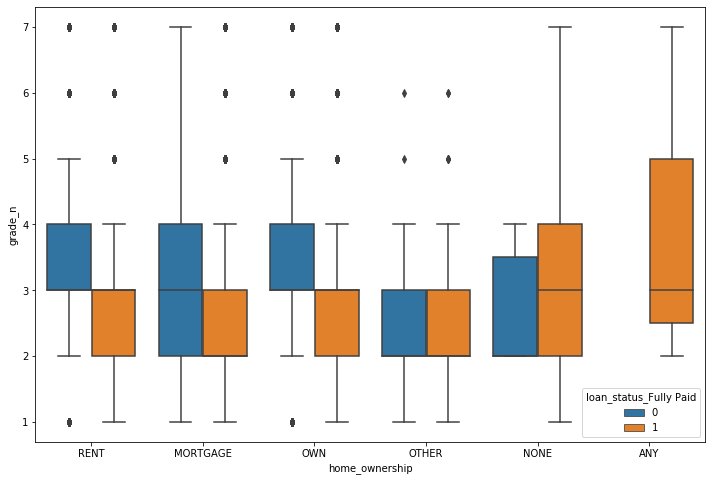

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='home_ownership',y='grade_n',data=loans,hue='loan_status_Fully Paid')

In [ ]:
def home_own (home):
  if home == 'RENT' or home == 'OWN':
    return True
  return False

In [ ]:
home_own('OTHER')

False

In [ ]:
loans['home_own_status']=loans['home_ownership'].apply(home_own)

In [ ]:
loans.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_Fully Paid,emp_y,term_ 60 months,grade_n,home_own_status
0,10000.0,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,10.0,0,2,True
1,8000.0,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,4.0,0,2,False
2,15600.0,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0.0,0,2,True
3,7200.0,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,6.0,0,1,True
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,9.0,1,3,False


In [ ]:
loans['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

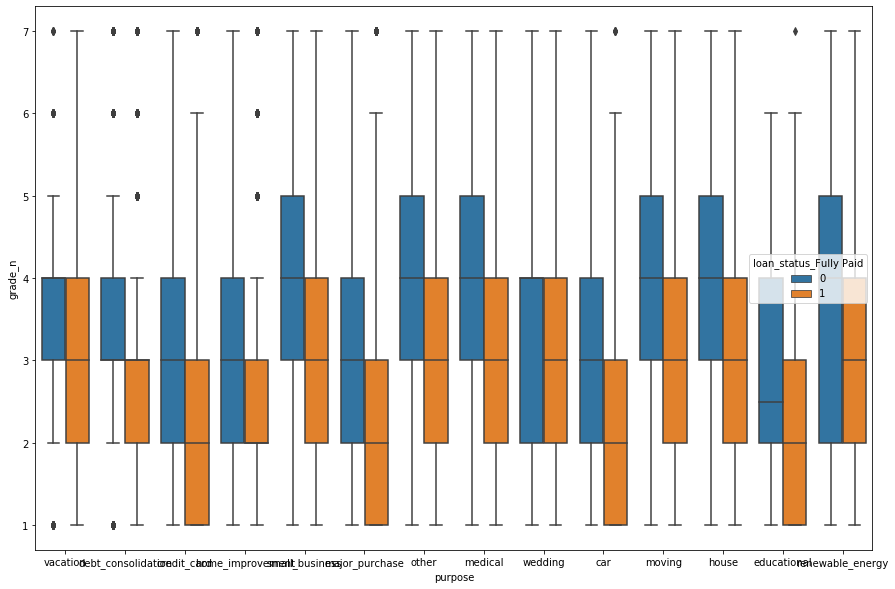

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='purpose',y='grade_n',data=loans,hue='loan_status_Fully Paid')

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 30 columns):
loan_amnt                 396030 non-null float64
int_rate                  396030 non-null float64
installment               396030 non-null float64
grade                     396030 non-null object
sub_grade                 396030 non-null object
emp_title                 373103 non-null object
emp_length                377729 non-null object
home_ownership            396030 non-null object
annual_inc                396030 non-null float64
verification_status       396030 non-null object
issue_d                   396030 non-null object
purpose                   396030 non-null object
title                     394275 non-null object
dti                       396030 non-null float64
earliest_cr_line          396030 non-null object
open_acc                  396030 non-null float64
pub_rec                   396030 non-null float64
revol_bal                 396030 non-null float64

In [ ]:
loans['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [ ]:
def verification (ver):
  if ver == 'Not Verified':
    return True
  return False

In [ ]:
verification('Verified')

False

In [ ]:
loans['verification']=loans['verification_status'].apply(verification)

In [ ]:
int(loans['issue_d'][6][-4:])

2015

In [ ]:
def str_year (year):
  return int(year[-4:])

In [ ]:
str_year(loans['earliest_cr_line'][3])

2006

In [ ]:
loans['issue_d_n']=loans['issue_d'].apply(str_year)
loans['earliest_cr_line_n']=loans['earliest_cr_line'].apply(str_year)

In [ ]:
loans.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_Fully Paid,emp_y,term_ 60 months,grade_n,home_own_status,verification,issue_d_n,earliest_cr_line_n
0,10000.0,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,10.0,0,2,True,True,2015,1990
1,8000.0,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,4.0,0,2,False,True,2015,2004
2,15600.0,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0.0,0,2,True,False,2015,2007
3,7200.0,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,6.0,0,1,True,True,2014,2006
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,9.0,1,3,False,False,2013,1999


In [ ]:
loans['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [ ]:
loans['application_type'].unique() 

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

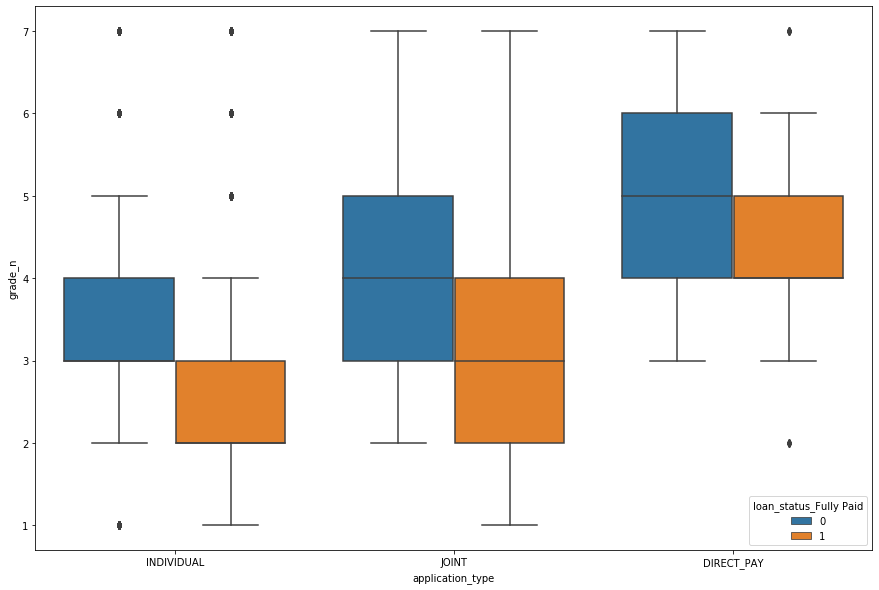

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='application_type',y='grade_n',data=loans,hue='loan_status_Fully Paid')

In [ ]:
loans=pd.get_dummies(data=loans,columns=['initial_list_status'],drop_first=True)

In [ ]:
def indi (ver):
  if ver == 'INDIVIDUAL':
    return True
  return False

In [ ]:
loans['application_type_a']=loans['application_type'].apply(indi)

In [ ]:
loans.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_Fully Paid,emp_y,term_ 60 months,grade_n,home_own_status,verification,issue_d_n,earliest_cr_line_n,initial_list_status_w,application_type_a
0,10000.0,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,10.0,0,2,True,True,2015,1990,1,True
1,8000.0,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,4.0,0,2,False,True,2015,2004,0,True
2,15600.0,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0.0,0,2,True,False,2015,2007,0,True
3,7200.0,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,6.0,0,1,True,True,2014,2006,0,True
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,9.0,1,3,False,False,2013,1999,0,True


In [ ]:
loans.groupby('purpose').sum()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_status_Fully Paid,emp_y,term_ 60 months,grade_n,home_own_status,verification,issue_d_n,earliest_cr_line_n,initial_list_status_w,application_type_a
purpose,,,,,,,,,,,,,,,,,,,,,,
car,3.861595e+07,5.573840e+04,1.173199e+06,3.086615e+08,64126.12,45156.0,734.0,5.032106e+07,1.893122e+05,103623.0,8152.0,486.0,4064.0,24469.0,919.0,11048,2651.0,2222.0,9454653,9386505,1367.0,4694.0
credit_card,1.202306e+09,1.026149e+06,3.672392e+07,6.139908e+09,1470491.85,962858.0,13036.0,1.555724e+09,4.824662e+06,2114392.0,150631.0,9325.0,69145.0,483985.0,16274.0,201284,42354.0,28629.0,167173840,165844611,35170.0,82877.0
debt_consolidation,3.489117e+09,3.268240e+06,1.065371e+08,1.711120e+10,4246024.29,2708843.0,42505.0,3.725090e+09,1.293234e+07,6080211.0,426533.0,29097.0,185867.0,1415452.0,61527.0,681615,117342.0,69515.0,472228385,468514575,95492.0,234034.0
educational,1.752925e+06,3.004160e+03,5.648032e+04,1.354344e+07,2917.83,2313.0,11.0,2.500173e+06,1.013408e+04,4775.0,512.0,7.0,215.0,924.0,11.0,627,181.0,174.0,516349,513348,0.0,257.0
home_improvement,3.391606e+08,3.159250e+05,1.018422e+07,2.193251e+09,350703.38,263190.0,5704.0,3.522449e+08,1.052700e+06,632016.0,59724.0,3765.0,19943.0,153955.0,6237.0,65170,5340.0,7660.0,48388690,47987421,10020.0,23990.0
house,3.388482e+07,3.437495e+04,1.057400e+06,1.789227e+08,30463.90,22822.0,372.0,2.468123e+07,8.629380e+04,52490.0,3855.0,252.0,1767.0,11652.0,600.0,7545,1408.0,557.0,4431431,4399999,680.0,2198.0
major_purchase,9.606522e+07,1.112493e+05,2.918855e+06,6.645357e+08,120168.84,86390.0,1393.0,9.396127e+07,3.472130e+05,198618.0,14615.0,885.0,7342.0,47541.0,1752.0,22705,4960.0,3525.0,17696165,17568890,3080.0,8782.0
medical,3.757452e+07,6.227989e+04,1.183891e+06,3.005232e+08,69156.04,44215.0,798.0,5.362276e+07,2.030432e+05,102472.0,7215.0,541.0,3285.0,24454.0,678.0,13438,2284.0,1553.0,8448743,8381397,1520.0,4192.0
moving,2.247350e+07,4.471158e+04,7.328606e+05,1.948614e+08,44619.66,28722.0,427.0,2.993960e+07,1.408764e+05,63296.0,3295.0,277.0,2184.0,12521.0,343.0,9832,2328.0,1017.0,5746288,5707412,928.0,2852.0


In [ ]:
loans['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [ ]:
# group 'debt_consolidation', 'credit_card' vs all others
def purpose (pur):
  if pur == 'debt_consolidation' or pur == 'credit_card':
    return True
  return False

In [ ]:
loans['purpose_a']=loans['purpose'].apply(purpose)

In [ ]:
loans.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_Fully Paid,emp_y,term_ 60 months,grade_n,home_own_status,verification,issue_d_n,earliest_cr_line_n,initial_list_status_w,application_type_a,purpose_a
0,10000.0,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,10.0,0,2,True,True,2015,1990,1,True,False
1,8000.0,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,4.0,0,2,False,True,2015,2004,0,True,True
2,15600.0,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0.0,0,2,True,False,2015,2007,0,True,True
3,7200.0,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,6.0,0,1,True,True,2014,2006,0,True,True
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,9.0,1,3,False,False,2013,1999,0,True,True


In [ ]:
loans.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'loan_status_Fully Paid', 'emp_y', 'term_ 60 months',
       'grade_n', 'home_own_status', 'verification', 'issue_d_n',
       'earliest_cr_line_n', 'initial_list_status_w', 'application_type_a',
       'purpose_a'],
      dtype='object')

In [ ]:
c_drop=['grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'title', 
       'earliest_cr_line', 
        'application_type',
       'address']

In [ ]:
loans_final=loans.drop(labels=c_drop,axis=1)

In [ ]:
loans_final.corr()['loan_status_Fully Paid'].sort_values()

grade_n                  -0.257286
int_rate                 -0.247758
term_ 60 months          -0.173246
revol_util               -0.082341
home_own_status          -0.067096
dti                      -0.062413
issue_d_n                -0.060502
loan_amnt                -0.059836
installment              -0.041082
earliest_cr_line_n       -0.038928
open_acc                 -0.028012
pub_rec                  -0.019933
initial_list_status_w    -0.009489
pub_rec_bankruptcies     -0.009383
purpose_a                -0.003795
application_type_a        0.002486
revol_bal                 0.010892
emp_y                     0.013154
total_acc                 0.017893
annual_inc                0.053432
mort_acc                  0.071276
verification              0.085163
loan_status_Fully Paid    1.000000
Name: loan_status_Fully Paid, dtype: float64

In [ ]:
loans_final.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status_Fully Paid', 'emp_y',
       'term_ 60 months', 'grade_n', 'home_own_status', 'verification',
       'issue_d_n', 'earliest_cr_line_n', 'initial_list_status_w',
       'application_type_a', 'purpose_a'],
      dtype='object')

In [ ]:
c_drop2=['initial_list_status_w','pub_rec_bankruptcies','purpose_a','application_type_a','revol_bal']

In [ ]:
loans_final2=loans_final.drop(labels=c_drop2,axis=1)

Train Test Split

In [ ]:
X = loans_final2.drop('loan_status_Fully Paid',axis=1).values
y = loans_final2['loan_status_Fully Paid'].values

In [ ]:
loans_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
loan_amnt                 396030 non-null float64
int_rate                  396030 non-null float64
installment               396030 non-null float64
annual_inc                396030 non-null float64
dti                       396030 non-null float64
open_acc                  396030 non-null float64
pub_rec                   396030 non-null float64
revol_bal                 396030 non-null float64
revol_util                396030 non-null float64
total_acc                 396030 non-null float64
mort_acc                  396030 non-null float64
pub_rec_bankruptcies      395495 non-null float64
loan_status_Fully Paid    396030 non-null uint8
emp_y                     396030 non-null float64
term_ 60 months           396030 non-null uint8
grade_n                   396030 non-null int64
home_own_status           396030 non-null bool
verification              396030 non-null bool
i

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Creating the Model

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

TensorFlow 2.x selected.


In [ ]:
X_train.shape

(277221, 17)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=17,activation='relu'))

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

Training the Model

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=128,epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 277221 samples, validate on 118809 samples
Epoch 1/600
277221/277221 [==============================] - 5s 18us/sample - loss: 0.4763 - val_loss: 0.4571
Epoch 2/600
277221/277221 [==============================] - 5s 16us/sample - loss: 0.4559 - val_loss: 0.4556
Epoch 3/600
277221/277221 [==============================] - 5s 16us/sample - loss: 0.4543 - val_loss: 0.4543
Epoch 4/600
277221/277221 [==============================] - 5s 17us/sample - loss: 0.4531 - val_loss: 0.4543
Epoch 5/600
277221/277221 [==============================] - 5s 16us/sample - loss: 0.4524 - val_loss: 0.4523
Epoch 6/600
277221/277221 [==============================] - 5s 16us/sample - loss: 0.4519 - val_loss: 0.4542
Epoch 7/600
277221/277221 [==============================] - 5s 17us/sample - loss: 0.4513 - val_loss: 0.4522
Epoch 8/600
277221/277221 [==============================] - 5s 16us/sample - loss: 0.4510 - val_loss: 0.4524
Epoch 9/600
277221/277221 [==============================] - 5s 17us

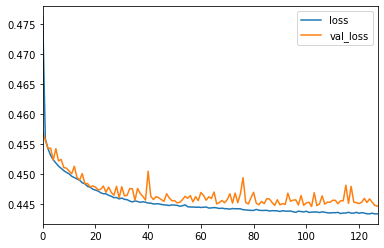

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.09      0.16     23260
           1       0.82      0.98      0.89     95549

    accuracy                           0.81    118809
   macro avg       0.68      0.54      0.53    118809
weighted avg       0.76      0.81      0.75    118809



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 2208 21052]
 [ 1836 93713]]


In [ ]:
loans_final2.corr()['loan_status_Fully Paid'].sort_values()

grade_n                  -0.257286
int_rate                 -0.247758
term_ 60 months          -0.173246
revol_util               -0.082341
home_own_status          -0.067096
dti                      -0.062413
issue_d_n                -0.060502
loan_amnt                -0.059836
installment              -0.041082
earliest_cr_line_n       -0.038928
open_acc                 -0.028012
pub_rec                  -0.019933
emp_y                     0.013154
total_acc                 0.017893
annual_inc                0.053432
mort_acc                  0.071276
verification              0.085163
loan_status_Fully Paid    1.000000
Name: loan_status_Fully Paid, dtype: float64

In [ ]:
c_drop3=['pub_rec','emp_y','total_acc']

In [ ]:
loans_final3=loans_final2.drop(labels=c_drop3,axis=1)

In [ ]:
loans_final3.corr()['loan_status_Fully Paid'].sort_values()

grade_n                  -0.257286
int_rate                 -0.247758
term_ 60 months          -0.173246
revol_util               -0.082341
home_own_status          -0.067096
dti                      -0.062413
issue_d_n                -0.060502
loan_amnt                -0.059836
installment              -0.041082
earliest_cr_line_n       -0.038928
open_acc                 -0.028012
annual_inc                0.053432
mort_acc                  0.071276
verification              0.085163
loan_status_Fully Paid    1.000000
Name: loan_status_Fully Paid, dtype: float64

In [ ]:
X = loans_final4.drop('loan_status_Fully Paid',axis=1).values
y = loans_final4['loan_status_Fully Paid'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(277221, 13)

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=14,activation='relu'))

model.add(Dense(units=6,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=256,epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 277221 samples, validate on 118809 samples
Epoch 1/600
277221/277221 [==============================] - 3s 10us/sample - loss: 0.4781 - val_loss: 0.4610
Epoch 2/600
277221/277221 [==============================] - 2s 9us/sample - loss: 0.4584 - val_loss: 0.4579
Epoch 3/600
277221/277221 [==============================] - 2s 9us/sample - loss: 0.4565 - val_loss: 0.4567
Epoch 4/600
277221/277221 [==============================] - 2s 9us/sample - loss: 0.4557 - val_loss: 0.4565
Epoch 5/600
277221/277221 [==============================] - 3s 9us/sample - loss: 0.4550 - val_loss: 0.4555
Epoch 6/600
277221/277221 [==============================] - 2s 9us/sample - loss: 0.4547 - val_loss: 0.4554
Epoch 7/600
277221/277221 [==============================] - 2s 9us/sample - loss: 0.4543 - val_loss: 0.4561
Epoch 8/600
277221/277221 [==============================] - 2s 9us/sample - loss: 0.4540 - val_loss: 0.4551
Epoch 9/600
277221/277221 [==============================] - 2s 9us/sample 

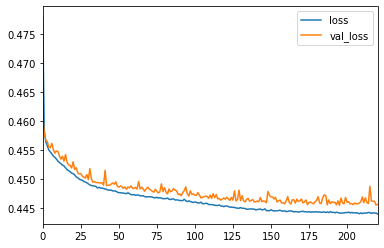

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.06      0.12     23260
           1       0.81      0.99      0.89     95549

    accuracy                           0.81    118809
   macro avg       0.69      0.53      0.50    118809
weighted avg       0.76      0.81      0.74    118809



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 1497 21763]
 [ 1182 94367]]


In [ ]:
grade={1:0, 2:0, 3:0, 4:0, 5:0, 6:1, 7:1}
loans_final3['grade']=loans_final3['grade_n'].map(grade)

In [ ]:
loans_final3.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_util,mort_acc,loan_status_Fully Paid,term_ 60 months,grade_n,home_own_status,verification,issue_d_n,earliest_cr_line_n,grade
0,10000.0,11.44,329.48,117000.0,26.24,16.0,41.8,0.0,1,0,2,True,True,2015,1990,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,53.3,3.0,1,0,2,False,True,2015,2004,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,92.2,0.0,1,0,2,True,False,2015,2007,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,21.5,0.0,1,0,1,True,True,2014,2006,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,69.8,1.0,0,1,3,False,False,2013,1999,0


In [ ]:
loans_final4=loans_final3.drop(['grade_n','open_acc'],axis=1)

In [ ]:
loans_final4

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_util,mort_acc,loan_status_Fully Paid,term_ 60 months,home_own_status,verification,issue_d_n,earliest_cr_line_n,grade
0,10000.0,11.44,329.48,117000.0,26.24,16.0,41.8,0.0,1,0,True,True,2015,1990,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,53.3,3.0,1,0,False,True,2015,2004,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,92.2,0.0,1,0,True,False,2015,2007,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,21.5,0.0,1,0,True,True,2014,2006,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,69.8,1.0,0,1,False,False,2013,1999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,34.3,0.0,1,1,True,False,2015,2004,0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,95.7,1.0,1,0,False,False,2015,2006,0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,66.9,0.0,1,0,True,False,2013,1997,0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,53.8,5.0,1,1,False,False,2012,1990,0


In [ ]:
loans_final4.corr()['loan_status_Fully Paid'].sort_values()

int_rate                 -0.247758
term_ 60 months          -0.173246
grade                    -0.120271
revol_util               -0.082341
home_own_status          -0.067096
dti                      -0.062413
issue_d_n                -0.060502
loan_amnt                -0.059836
installment              -0.041082
earliest_cr_line_n       -0.038928
annual_inc                0.053432
mort_acc                  0.071276
verification              0.085163
loan_status_Fully Paid    1.000000
Name: loan_status_Fully Paid, dtype: float64